( References : https://www.healthline.com ; https://www.mayoclinic.org)
# Heart Disease
Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease; heart rhythm problems (arrhythmias); and heart defects you're born with (congenital heart defects), among others.

### Statistics :
* As of 2016, 28.2 million U.S. adultsTrusted Source were diagnosed with heart disease. In 2015, nearly 634,000 Trusted Source people died of heart disease, making it the leading cause of death.

* According to the American Heart Association, approximately every 40 seconds an American will have a heart attack. The estimated annual incidence of heart attacks in the United States is 720,000 new attacks and 335,000 recurrent attacks.

### Symptoms can include:
* Chest pain, chest tightness, chest pressure and chest discomfort (angina)
* Shortness of breath
* Pain, numbness, weakness or coldness in your legs or arms if the blood vessels in those parts of your body are narrowed
* Pain in the neck, jaw, throat, upper abdomen or back

### Risk factors :
* Tobacco use. Chewing tobacco, smoking and long-term exposure to secondhand smoke damage the interior walls of arteries — including arteries to your heart — allowing deposits of cholesterol to collect and block blood flow.

* Diabetes. Diabetes is the inability of your body to produce enough or respond to insulin properly. Insulin, a hormone secreted by your pancreas, allows your body to use glucose, which is a form of sugar from foods. Diabetes increases the risk of coronary artery disease, which leads to angina and heart attacks by speeding up atherosclerosis and increasing your cholesterol levels.

* High blood pressure. Blood pressure is determined by the amount of blood your heart pumps and the amount of resistance to blood flow in your arteries. Over time, high blood pressure damages arteries by accelerating hardening of the arteries.

* High blood cholesterol or triglyceride levels. Cholesterol is a major part of the deposits that can narrow arteries throughout your body, including those that supply your heart. A high level of the wrong kind of cholesterol, known as low-density lipoprotein (LDL) cholesterol (the "bad" cholesterol), increases your risk of angina and heart attacks. A high level of triglycerides, a type of blood fat related to your diet, also is undesirable.

* Family history of heart disease. If a family member has coronary artery disease or has had a heart attack, you're at a greater risk of developing angina.

* Older age. Men older than 45 and women older than 55 have a greater risk than do younger adults.

* Lack of exercise. An inactive lifestyle contributes to high cholesterol, high blood pressure, type 2 diabetes and obesity. However, it is important to talk with your doctor before starting an exercise program.

* Obesity. Obesity raises the risk of angina and heart disease because it's associated with high blood cholesterol levels, high blood pressure and diabetes. Also, your heart has to work harder to supply blood to the excess tissue.

* Stress. Stress can increase your risk of angina and heart attacks. Too much stress, as well as anger, also can raise your blood pressure. Surges of hormones produced during stress can narrow your arteries and worsen angina.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

#Ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder # Encode Categorical Variable to Numerical Variable
from sklearn.preprocessing import Imputer # Imputer Class to replace missing values
from sklearn.metrics import confusion_matrix # Library for model evaluation
from sklearn.metrics import accuracy_score # Library for model evaluation
from sklearn.model_selection import train_test_split # Library to split datset into test and train

from sklearn.dummy import DummyClassifier
from sklearn.linear_model  import LogisticRegression # Logistic Regression Classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.ensemble  import RandomForestClassifier # Random Forest Classifier
from sklearn.neighbors import KNeighborsClassifier # K Nearest neighbors Classifier
from sklearn.naive_bayes import GaussianNB #Naive Bayes Classifier
from sklearn.svm import SVC #Support vector Machine Classifier
from sklearn.ensemble import AdaBoostClassifier # Ada Boost Classifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from pdpbox import pdp, info_plots
import shap
shap.initjs()
import lime
import lime.lime_tabular

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# First Look into the data
heart_df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
print(f'Rows - {heart_df.shape[0]}, Columns - {heart_df.shape[1]}')
heart_df.head()

Rows - 303, Columns - 14


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Checking the datatype of the columns
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

All Columns are numeric. Here are the column details
* age      - Person's Age in years

* sex      - Gender (1 = male; 0 = female)

* cp       - Chest Pain (1: typical angina ; 2: atypical angina ; 3: non-anginal pain ; 4: asymptomatic)
    * Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood. It may feel like pressure or       squeezing in your chest
    * Atypical angina implies that the complaint is actually angina pectoris, though not conforming in every way to the expected or
      classic description
    * Non-anginal pain - A chest pain is very likely nonanginal if its duration is over 30 minutes or less than 5 seconds.
    * means neither causing nor exhibiting symptoms of disease.
    

* trestbps - Resting blood pressure (in mm Hg on admission to the hospital) . Optimal blood pressure typically is defined as 120 mm Hg systolic — which is the pressure as your heart beats — over 80 mm Hg diastolic — which is the pressure as your heart relaxes. For your resting heart rate, the target is between 60 and 100 beats per minute (BPM)

* chol     - Serum Cholestoral in mg/dl . Total cholesterol levels less than 200 milligrams per deciliter (mg/dL) are considered desirable for adults. A reading between 200 and 239 mg/dL is considered borderline high and a reading of 240 mg/dL and above is considered high

* fbs      - Fasting blood sugar > 120 (mg/dl) (1 = true; 0 = false) . A fasting blood sugar level less than 100 mg/dL (5.6 mmol/L) is normal. A fasting blood sugar level from 100 to 125 mg/dL (5.6 to 6.9 mmol/L) is considered prediabetes. If it's 126 mg/dL (7 mmol/L) or higher on two separate tests, you have diabetes

* restecg  - Resting electrocardiographic results (0: normal ; 1: having ST-T wave abnormality ; 2: showing probable or definite left  ventricular hypertrophy by Estes' criteria).Resting echocardiography is a non-invasive test that can assess ventricular function, heart valve anatomy and function and regional wall motion abnormalities.

* thalach  - Maximum heart rate achieved

* exang    - Exercise induced angina (1 = yes; 0 = no). When you increase the demand for oxygen, such as when you exercise, this can cause angina

* oldpeak  - ST depression induced by exercise relative to rest . ST depression refers to a finding on an electrocardiogram wherein the trace in the ST segment is abnormally low below the baseline

* slope    - Slope of the peak exercise ST segment (1: upsloping ; 2: flat ; 3: downsloping)

* ca       - Number of major vessels (0-3) colored by flourosopy

* thal     - 3 = normal; 6 = fixed defect; 7 = reversable defect . Thalassemia is a blood disorder passed down through families (inherited) in which the body makes an abnormal form or inadequate amount of hemoglobin.

* target   - Heart Disease (1 - Yes ; 0 - No)

In [6]:
# Renaming the columns for better understanding
heart_df = heart_df.rename(columns={'cp' : 'chest_pain', 
                                    'trestbps' : 'rest_blood_pressure', 
                                    'chol' : 'cholesterol', 
                                    'fbs' : 'fast_blood_sugar', 
                                    'restecg' : 'rest_ecg', 
                                    'thalach' : 'max_heart_rate',
                                    'exang' : 'exercise_ind_angina', 
                                    'oldpeak' : 'st_dep_ind_exc', 
                                    'slope' : 'slope_peak_exer_st', 
                                    'ca' : 'no_vessels_colored_fl', 
                                    'thal' : 'thalassemia'})
heart_df.head()

,age,sex,chest_pain,rest_blood_pressure,cholesterol,fast_blood_sugar,rest_ecg,max_heart_rate,exercise_ind_angina,st_dep_ind_exc,slope_peak_exer_st,no_vessels_colored_fl,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart_df.describe()

,age,sex,chest_pain,rest_blood_pressure,cholesterol,fast_blood_sugar,rest_ecg,max_heart_rate,exercise_ind_angina,st_dep_ind_exc,slope_peak_exer_st,no_vessels_colored_fl,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Observations :

1. All rows have count=303. So no misssing data.
2. sex/Gender - Max we have 1 . So Male is majority. We dont know the distribution yet.
3. blood_pressure in the dataset varies from 94 to 200. Median is 130.
4. cholestrol varies from 126 to 564 with median as 240 . 
5. Fasting blood sugar > 120 mg/dl is a categorical field having > 120 mg/dl as majority . 
6. rest_ecg is a categorical field with values ranging 0 to 2 with majority as 2.
7. heart rate varies 71 to 202 with median as 153
8. exercise_ind_angina is categorical field with 0 & 1 , 1 being the majority
8. st_dep_ind_exc varies 0 to 6.2 with median depression at 0.8
9. slope_peak_exer_st is a categorical field with value 0, 1 and 2
10. no_vessels_colored_fl is a categorical field with value 0 to 4 with 4 being majority
11. thalassemia is a categorical field with value 0 to 3 with 3 being majority
12. Target - Has 2 values 0 & 1 with 1 being majority

In [8]:
# Distribution of the target variable
round(heart_df['target'].value_counts(normalize=True), 2)*100

1    54.0
0    46.0
Name: target, dtype: float64

* Almost balanced dataset with heart disease yes as 54% and  non heart disease as 46%

# Univariate Analysis

In [9]:
cat_cols  = ['target', 'sex', 'chest_pain', 'rest_ecg', 'exercise_ind_angina', 'slope_peak_exer_st', 'no_vessels_colored_fl', 'thalassemia', 'fast_blood_sugar']
cont_cols = ['age', 'rest_blood_pressure', 'cholesterol', 'max_heart_rate', 'st_dep_ind_exc', 'age']

In [10]:
heart_df_uv = heart_df.copy()

In [11]:
# Printing the unique values of Categorcal columns
for cols in cat_cols:
    print(cols, '-', heart_df_uv[cols].unique())

target - [1 0]
sex - [1 0]
chest_pain - [3 2 1 0]
rest_ecg - [0 1 2]
exercise_ind_angina - [0 1]
slope_peak_exer_st - [0 2 1]
no_vessels_colored_fl - [0 2 1 3 4]
thalassemia - [1 2 3 0]
fast_blood_sugar - [1 0]


In [12]:
# Create Numeric to Value mapping for better graphical representation
map_sex = {0: 'female', 1: 'male'}
map_chest_pain = {0:'none', 1:'typ_ang', 2:'atyp_ang', 3:'non_ang'}
map_rest_ecg = {0:'normal', 1:'st-t abnorm', 2:'left_vent_hyptrophy'}
map_exercise_ind_angina = {0:'no', 1:'yes'}
map_slope_peak_exer_st = {0:'unknown', 1:'upsloping', 2:'flat'}
map_thal = {0:'unknown0', 1:'unknown1', 2:'unknown2', 3:'normal'}
map_fast_blood_sugar = {0:'>120',1:'<=120'}
map_target={0:'No', 1:'Yes'}

# Updating the mapping in dataframe
heart_df_uv["sex"] = heart_df_uv["sex"].map(map_sex)
heart_df_uv["chest_pain"] = heart_df_uv["chest_pain"].map(map_chest_pain)
heart_df_uv["rest_ecg"] = heart_df_uv["rest_ecg"].map(map_rest_ecg)
heart_df_uv["exercise_ind_angina"] = heart_df_uv["exercise_ind_angina"].map(map_exercise_ind_angina)
heart_df_uv["slope_peak_exer_st"] = heart_df_uv["slope_peak_exer_st"].map(map_slope_peak_exer_st)
heart_df_uv["thalassemia"] = heart_df_uv["thalassemia"].map(map_thal)
heart_df_uv["fast_blood_sugar"] = heart_df_uv["fast_blood_sugar"].map(map_fast_blood_sugar)
heart_df_uv["target"] = heart_df_uv["target"].map(map_target)
heart_df_uv.head()

,age,sex,chest_pain,rest_blood_pressure,cholesterol,fast_blood_sugar,rest_ecg,max_heart_rate,exercise_ind_angina,st_dep_ind_exc,slope_peak_exer_st,no_vessels_colored_fl,thalassemia,target
0,63,male,non_ang,145,233,<=120,normal,150,no,2.3,unknown,0,unknown1,Yes
1,37,male,atyp_ang,130,250,>120,st-t abnorm,187,no,3.5,unknown,0,unknown2,Yes
2,41,female,typ_ang,130,204,>120,normal,172,no,1.4,flat,0,unknown2,Yes
3,56,male,typ_ang,120,236,>120,st-t abnorm,178,no,0.8,flat,0,unknown2,Yes
4,57,female,none,120,354,>120,st-t abnorm,163,yes,0.6,flat,0,unknown2,Yes


Univariate Analysis of Categorical Variables


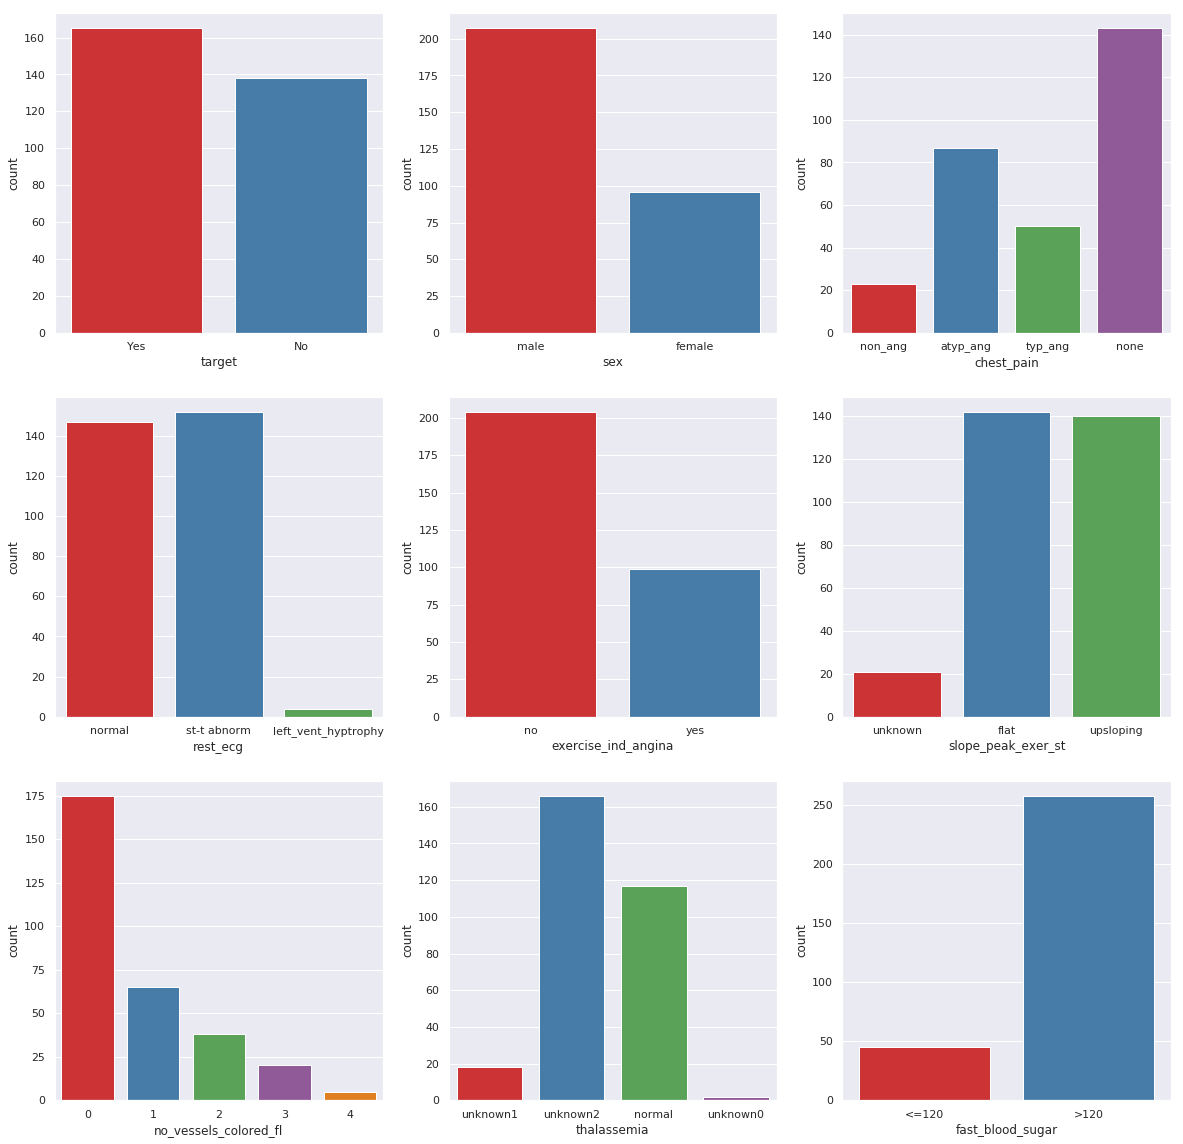

In [13]:
# Univariate Analysis of Categorical Columns
rows = 3 ; columns = 3
cat_cols_np_arr = np.array(cat_cols).reshape(3, 3)

f, axes = plt.subplots(rows, columns, figsize=(20, 20))
print('Univariate Analysis of Categorical Variables')
for row in range(rows):
    for column in range(columns):
        sns.countplot(heart_df_uv[cat_cols_np_arr[row][column]], 
                      palette = "Set1", 
                      ax = axes[row, column])

* Fairly balanced datset in terms of target variable.
* Female sample size is almost half as male.
* Chest pain none is majority. This filed has data issue and 0 is not defined in mapping. Assuming 0 means no pain
* thalassemia also has data issues with mapping not provided for 0, 1 and 2 . Majority is 2.
* Sample size for fasting blood sugar > 120mg/dl is more.

Univariate Analysis of Continuous Variables


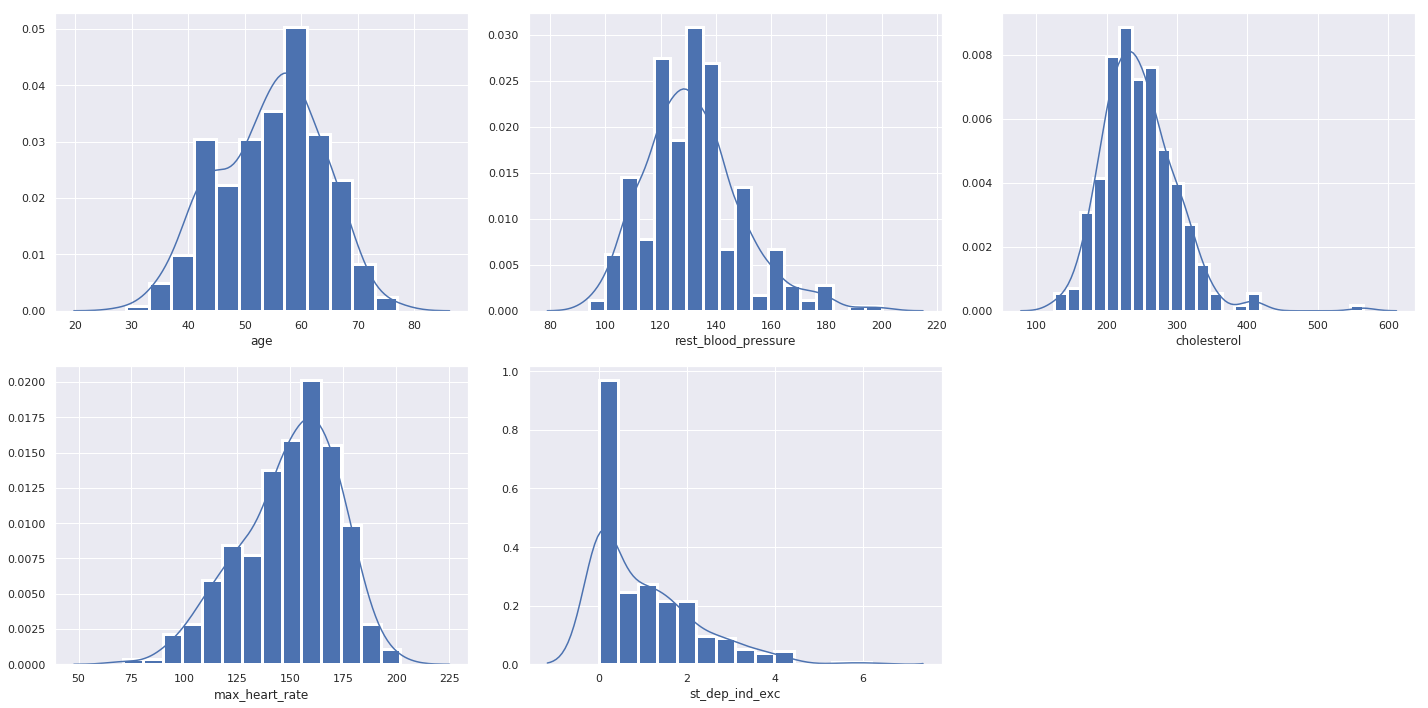

In [14]:
# Univariate Analysis of Continuous Columns
rows = 2 ; columns = 3
cont_cols_np_arr = np.array(cont_cols).reshape(2,3)

f, axes = plt.subplots(rows, columns, figsize=(20, 10))
print('Univariate Analysis of Continuous Variables')

for row in range(rows):
    for column in range(columns):
        sns.distplot(heart_df[cont_cols_np_arr[row][column]], 
                     ax = axes[row, column], 
                     hist=True, 
                     kde=True, 
                     color='b',
                     hist_kws={"linewidth": 3,
                            "alpha": 1, "color": "b"}
                     )
plt.tight_layout()
f.delaxes(ax= axes[1,2])

* age  field is normal distributed with majority band falling in the category of 50-65 years.
* resting blood presssure follows normal distribution with majority b/w 120-140, median at 130
* cholesterol follows normal distribution with 200-300 is majority. Under 200 is ideal.
* max heart rate , slightly left skewed has heart rate from 50 to 225. Ideal is 60-100 depending on age.
* ST depression induced by exercise relative to rest is right tailed varying b/w 0 to 6.

Univariate Analysis of Categorical Variables


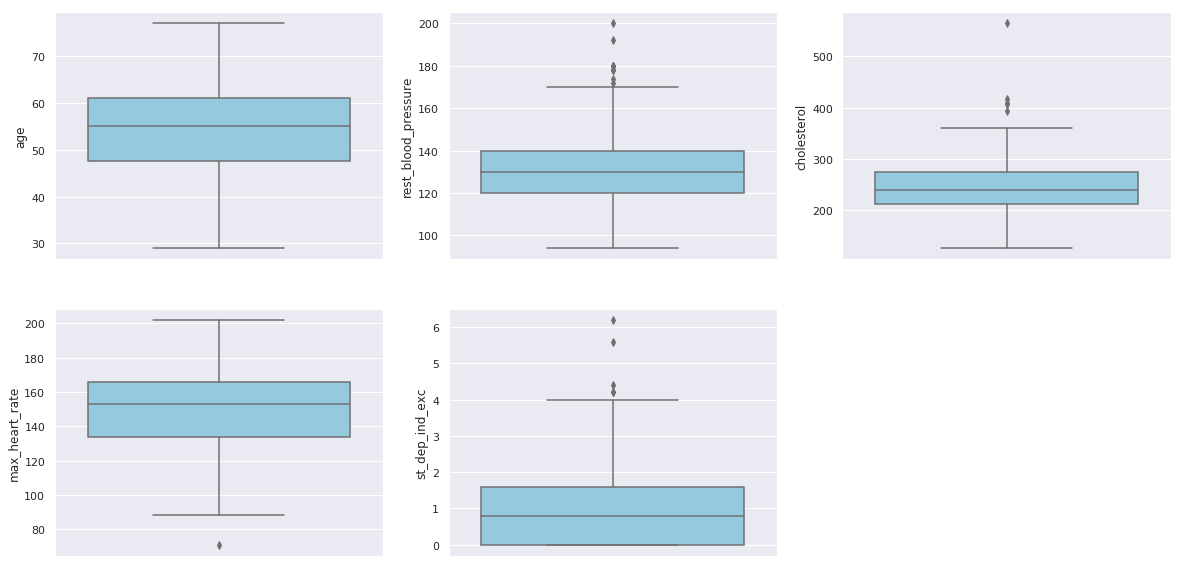

In [15]:
# Univariate Analysis of Continuous Columns
rows = 2 ; columns = 3
cont_cols_np_arr = np.array(cont_cols).reshape(2,3)

f, axes = plt.subplots(rows, columns, figsize=(20, 10))
print('Univariate Analysis of Categorical Variables')
for row in range(rows):
    for column in range(columns):
        sns.boxplot(heart_df[cont_cols_np_arr[row][column]], ax = axes[row, column], orient="v", color="skyblue")
f.delaxes(ax= axes[1,2])

* Resting blood pressure 170 an above stands outlier
* Cholesterol above 400 is an outlier. Ideal is below 200. Above 400 brings big risk of heart attack.
* ST depression induced by exercise relative to rest 4-6 seems above the IQR.

# Bivariate Analysis

## Categorical & Target

Bivariate Analysis of Categorical Variables


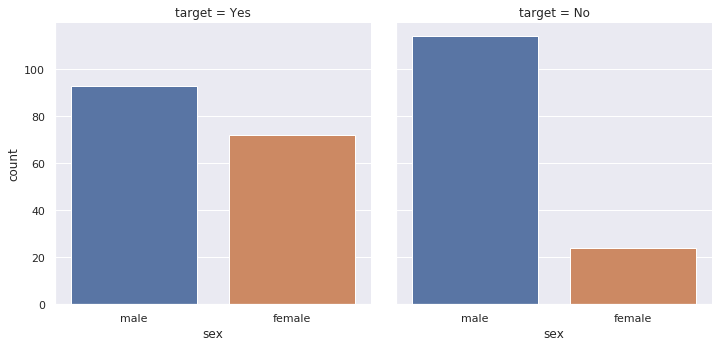

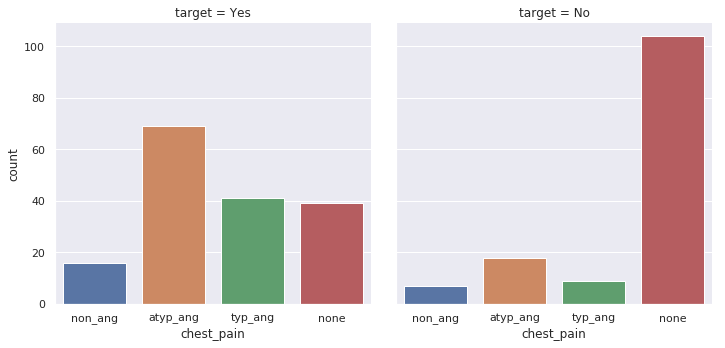

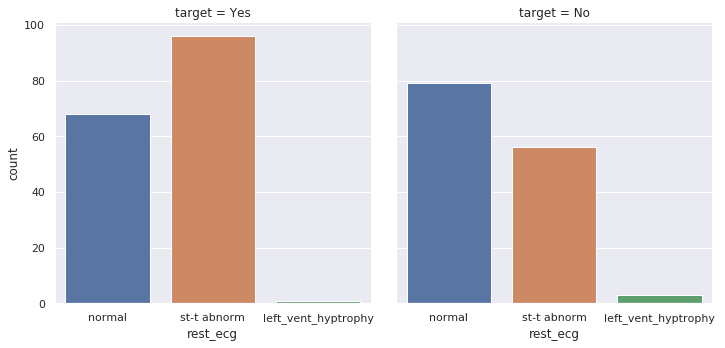

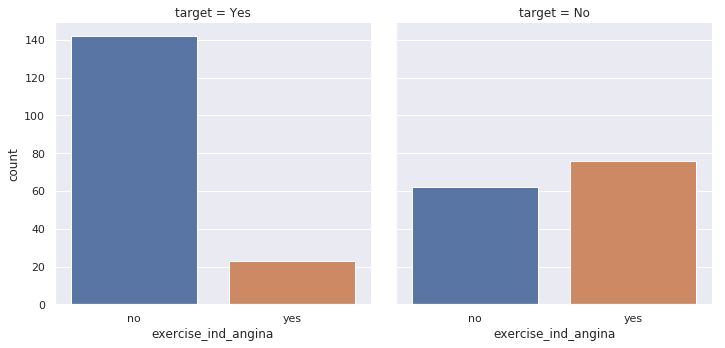

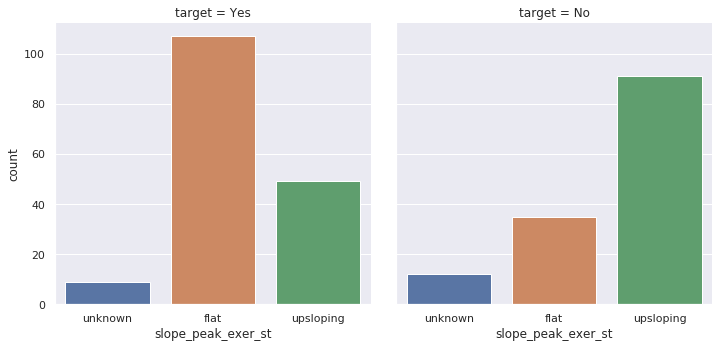

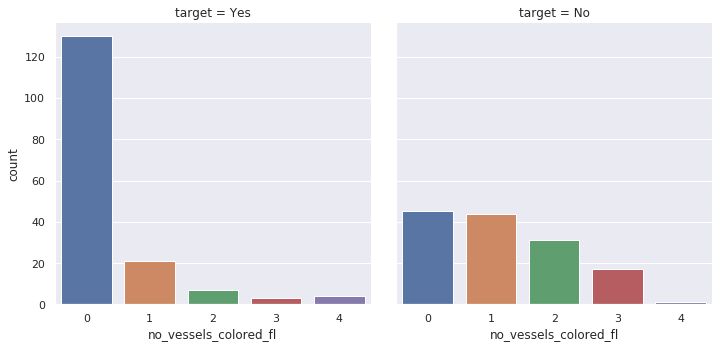

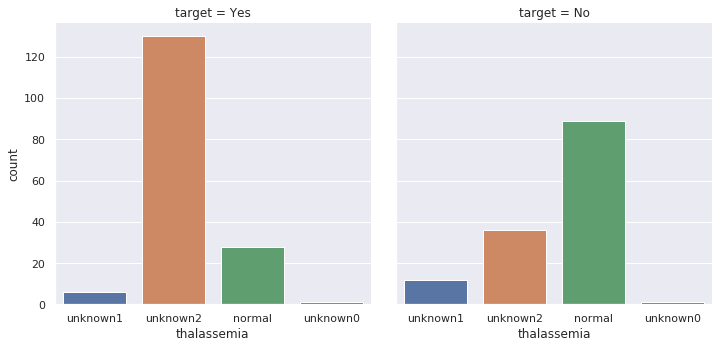

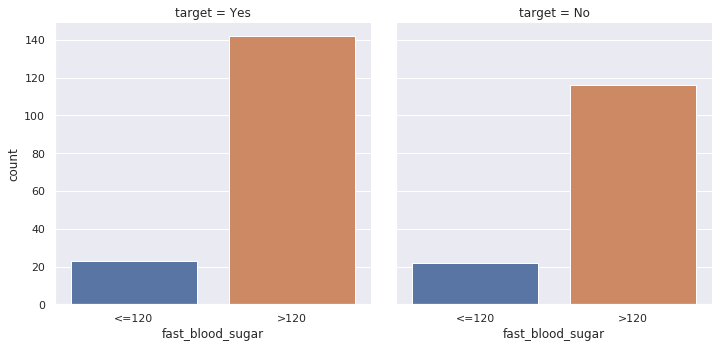

In [16]:
# Bivariate Analysis of Categorical Columns
cat_cols  = ['sex', 'chest_pain', 'rest_ecg', 'exercise_ind_angina', 'slope_peak_exer_st', 'no_vessels_colored_fl', 'thalassemia' ,'fast_blood_sugar']
print('Bivariate Analysis of Categorical Variables')
for row in cat_cols:
    sns.catplot(x=row, 
                col="target",
                data=heart_df_uv, 
                kind="count");

* More males have heart disease
* atypcal angina is contributing most to the heart disease. Chest pain 0 (assumed as None definitely means no heart diseases)
* st-t abnormality is contributing most to the heart disease. if 'normal' , high chances there is no heart disease
* Majority of the sample having heart disease is not exercise induced.
* Slop_peak_exer_st 'yes' definitely indicating higher chances of heart disease
* No of colored vessels 0 indicates heart disease
* thal, value -2 indicates higher chances
* high fasting blood sugar also indicates higher chances of heart disease

## Continuous & Target

Bivariate Analysis of Continuous Variables


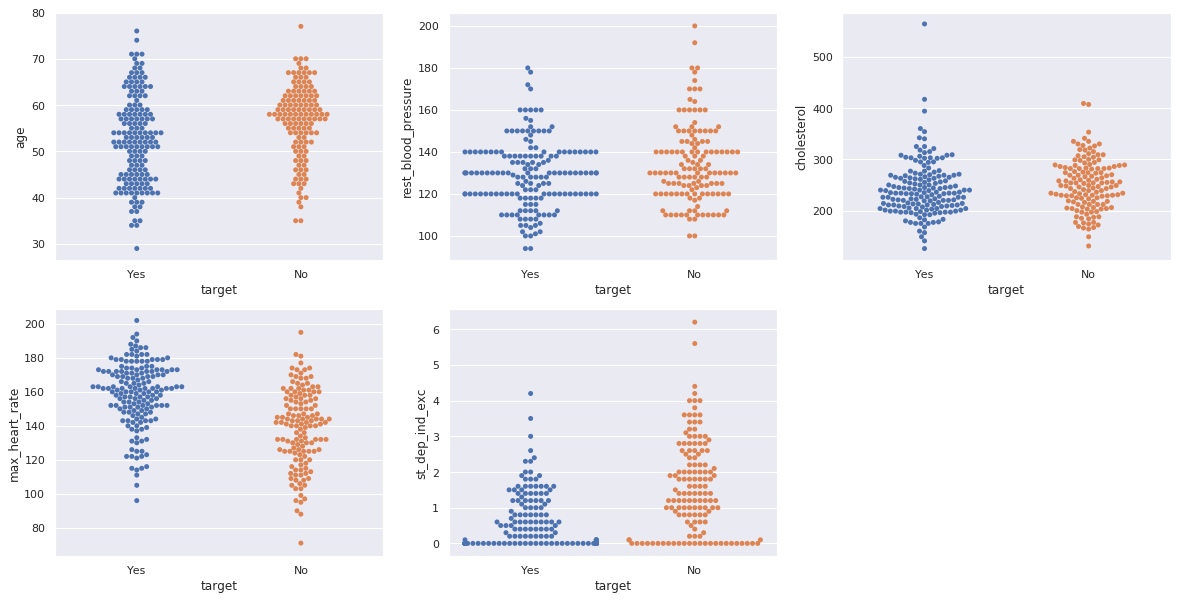

In [17]:
# Bivariate Analysis of Continuous Columns
print('Bivariate Analysis of Continuous Variables')

cont_cols = ['age', 'rest_blood_pressure', 'cholesterol', 'max_heart_rate', 'st_dep_ind_exc', 'age']
rows = 2 ; columns = 3
cont_cols_np_arr = np.array(cont_cols).reshape(2,3)

f, axes = plt.subplots(rows, columns, figsize=(20, 10))
for row in range(rows):
    for column in range(columns):
        sns.swarmplot(x='target', 
                    y=cont_cols_np_arr[row][column],
                    data=heart_df_uv,
                    ax = axes[row, column],
                   )
f.delaxes(ax= axes[1,2])

In [18]:
print('Impact of age on Heart Disease')
bins = pd.cut(heart_df_uv['age'], [0, 20, 40, 60, 80, 90, 100])
df = heart_df_uv.groupby([bins, 'target'])['target'].agg(['count']).reset_index().pivot(index='age', columns='target', values='count').fillna(0).reset_index()
df['Yes(%)'] = round((df['Yes']/(df['Yes'] + df['No'])*100),0)
df

Impact of age on Heart Disease


target,age,No,Yes,Yes(%)
0,"(20, 40]",6,13,68.0
1,"(40, 60]",88,117,57.0
2,"(60, 80]",44,35,44.0


In [19]:
print('Impact of blood pressure on Heart Disease')
bins = pd.cut(heart_df_uv['rest_blood_pressure'], [0, 100, 120, 140, 160, 180, 200])
df = heart_df_uv.groupby([bins, 'target'])['target'].agg(['count']).reset_index().pivot(index='rest_blood_pressure', columns='target', values='count').fillna(0).reset_index()
df['Yes(%)'] = round((df['Yes']/(df['Yes'] + df['No'])*100),0)
df

Impact of blood pressure on Heart Disease


target,rest_blood_pressure,No,Yes,Yes(%)
0,"(0, 100]",2.0,4.0,67.0
1,"(100, 120]",35.0,56.0,62.0
2,"(120, 140]",63.0,78.0,55.0
3,"(140, 160]",27.0,23.0,46.0
4,"(160, 180]",9.0,4.0,31.0
5,"(180, 200]",2.0,0.0,0.0


In [20]:
print('Impact of cholesterol on Heart Disease')
bins = pd.cut(heart_df_uv['rest_blood_pressure'], [0, 100, 120, 140, 160, 180, 200])
df = heart_df_uv.groupby([bins, 'target'])['target'].agg(['count']).reset_index().pivot(index='rest_blood_pressure', columns='target', values='count').fillna(0).reset_index()
df['Yes(%)'] = round((df['Yes']/(df['Yes'] + df['No'])*100),0)
df

Impact of cholesterol on Heart Disease


target,rest_blood_pressure,No,Yes,Yes(%)
0,"(0, 100]",2.0,4.0,67.0
1,"(100, 120]",35.0,56.0,62.0
2,"(120, 140]",63.0,78.0,55.0
3,"(140, 160]",27.0,23.0,46.0
4,"(160, 180]",9.0,4.0,31.0
5,"(180, 200]",2.0,0.0,0.0


# Multivariate Analysis

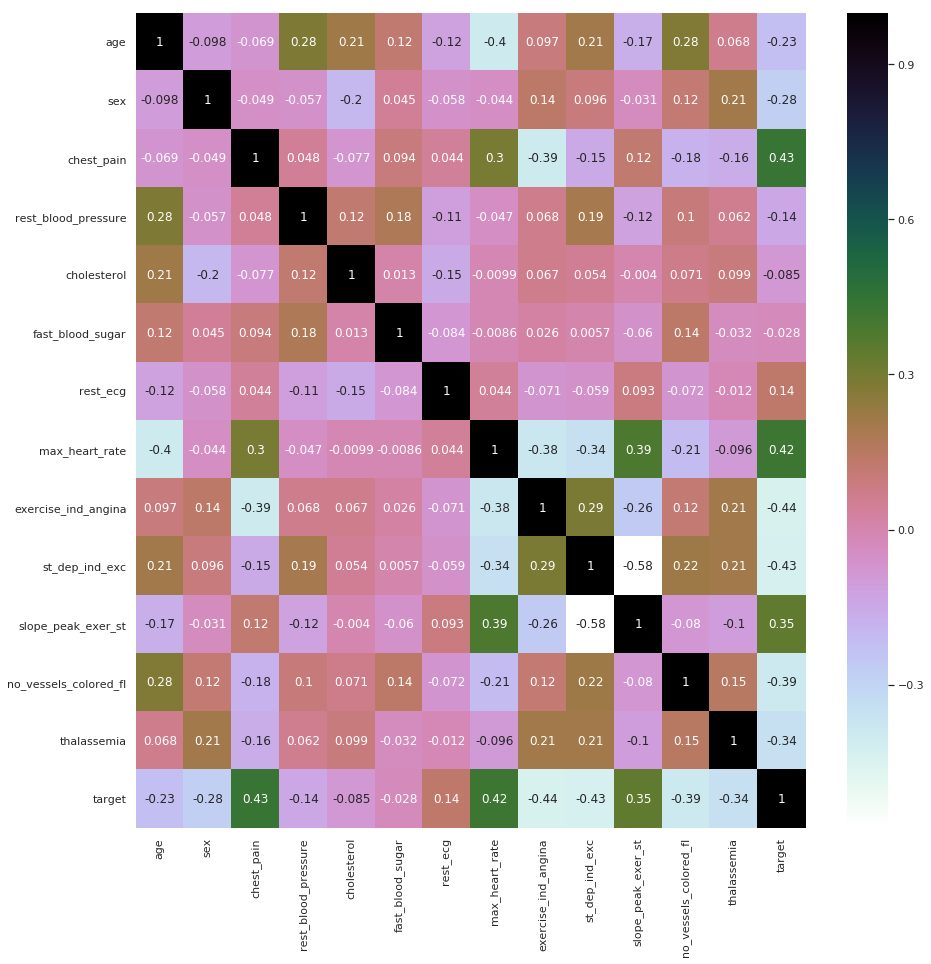

In [21]:
plt.figure(figsize=(15,15)) 
sns.heatmap(heart_df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

* Chespain, max_heart_rate and slope_peak shows moderate postive co-relation
* exercise_ind_angina & st_dep_ind_exc shows moderate negative corelation

In [22]:
# For Single Classifier Creating function for Confusion Matrix , Precision, Recall and F1 Score
def plot_confusion_matrix(classifier, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    
    print("\n",classifier,"\n")
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap='RdBu')
    classNames = ['Heart Disease-No','Heart Disease-Yes']
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), 
                     horizontalalignment='center', color='White')
    
    plt.show()
        
    tn, fp, fn, tp = cm.ravel()

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    F1 = 2*recall*precision/(recall+precision)

    print('Recall={0:0.3f}'.format(recall),'\nPrecision={0:0.3f}'.format(precision))
    print('F1={0:0.3f}'.format(F1))
    return;

In [23]:
#For Single Classifier Creating function to plot precision_recall_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
def plot_prec_rec_curve(classifier, y_test, y_pred):
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    average_precision = average_precision_score(y_test, y_pred)

#     print('Average precision-recall score: {0:0.3f}'.format(
#           average_precision))

    plt.plot(recall, precision, label='area = %0.3f' % average_precision, color="green")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

In [24]:
# Function for Precsion, Recall and F1 Score
def calc_classfier_metric(classifier, y_true, y_pred):
    '''
    Function for Precsion, Recall and F1 Score
    '''
    accuracy      = accuracy_score(y_test, y_pred)
    precision     = precision_score(y_test, y_pred)
    recall        = recall_score(y_test, y_pred)
    F1_score      = f1_score(y_test, y_pred)
    roc_auc_scr   = roc_auc_score(y_test, y_pred)
    conf_mat      = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, F1_score, roc_auc_scr, conf_mat;

In [25]:
# Function for Confusion Matrix
def view_confusion_matrix(class_perf_df, columns):
    '''
    Function for Confusion Matrix
    '''
    rows = int(class_perf_df.shape[0]/ columns)
    plt.figure(figsize=(15,13))

    for i in range(class_perf_df.shape[0]):
        plt.subplot(rows,columns,i+1)
        plt.title(class_perf_df['Classifier'].loc[i])
        ax=sns.heatmap(class_perf_df['Conf_Mtrx'].loc[i],
                    annot=True,
                    cmap="coolwarm",
                    fmt="d",
                    cbar=False, 
                    annot_kws={"size": 12},
                    linewidths=1.2,
                    linecolor='w',
                   )
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 10)
        ax.set_yticklabels(ax.get_yticklabels(), rotation = 25, fontsize = 10)
        ax.set_xlabel('True label') 
        ax.set_ylabel('Predicted label')
    
    return;

In [26]:
# Build Classification Model
def build_class_model(X_train, X_test, y_train, y_test, classifier_model):
    '''
    Functio to Build Classification Model
    '''
    classifier_performance = []
    cnf_lst = []

    for classifier in classifier_model:

        # Fitting the training set into classification model
        classifier.fit(X_train,y_train)

        # Predicting the output on test datset
        y_pred = classifier.predict(X_test)    

        # Cross Validation Score on training test
        scores = cross_val_score(classifier, X_train,y_train, cv=5)
        cv_score_mean = scores.mean()

        # Classification score
        accuracy, precision, recall, F1_score, roc_auc_scr, conf_mat = calc_classfier_metric(classifier, y_test, y_pred)
        classifier_performance.append([classifier.__class__.__name__, cv_score_mean, conf_mat, accuracy, precision, recall, F1_score, roc_auc_scr])

        class_perf_df = pd.DataFrame(classifier_performance, columns=['Classifier', 'Training_CV_Score', 'Conf_Mtrx', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC_Scr']).sort_values('F1_Score', ascending = False)
    
    return class_perf_df;

In [27]:
# Create Test Train Split
X = heart_df.drop(columns=['target'])
y = heart_df['target']

# #Dividing data into test & train splitting 70% data for training anf 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 242 samples in the training set and 61 samples in the test set


,Classifier,Training_CV_Score,Conf_Mtrx,Accuracy,Precision,Recall,F1_Score,ROC_AUC_Scr
4,XGBClassifier,0.797590,"[[25, 4], [5, 27]]",0.852459,0.870968,0.84375,0.857143,0.852909
5,LGBMClassifier,0.789250,"[[25, 4], [5, 27]]",0.852459,0.870968,0.84375,0.857143,0.852909
2,RandomForestClassifier,0.818342,"[[26, 3], [6, 26]]",0.852459,0.896552,0.81250,0.852459,0.854526
3,AdaBoostClassifier,0.760504,"[[25, 4], [8, 24]]",0.803279,0.857143,0.75000,0.800000,0.806034
1,DecisionTreeClassifier,0.743405,"[[25, 4], [11, 21]]",0.754098,0.840000,0.65625,0.736842,0.759159
0,DummyClassifier,0.549584,"[[0, 29], [0, 32]]",0.524590,0.524590,1.00000,0.688172,0.500000


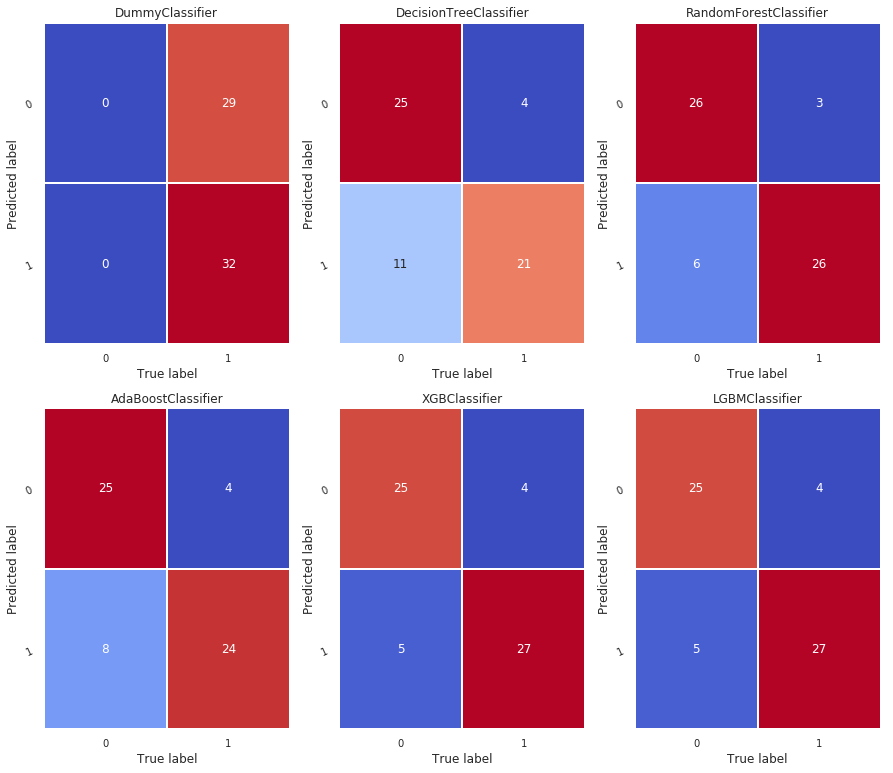

In [28]:
# Machine Learning Model Build
classifier_model = [DummyClassifier(strategy= 'most_frequent', random_state=42),
                    DecisionTreeClassifier(random_state=42),
                    RandomForestClassifier(random_state=42), 
                    AdaBoostClassifier(random_state=42), 
                    XGBClassifier(objective="binary:logistic", random_state=42),
                    LGBMClassifier(random_state=42)
                   ]

# Call Classification module
class_perf_df = build_class_model(X_train, X_test, y_train, y_test, classifier_model)

# Show Confusion Matrix
view_confusion_matrix(class_perf_df, columns=3)

# Show Classification Summary
class_perf_df

In [29]:
# # Hyper Paramater Tuning using Grid Search - Random Forest
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier(random_state = 42)
grid_params = {'n_estimators': [1, 2, 5, 7, 10, 15, 20, 50, 100],
               'criterion':['gini', 'entropy'],
               'max_depth': [None, 2, 3, 5, 7, 10]
              }

grid_search = GridSearchCV(rf_classifier, param_grid = grid_params, scoring='f1', cv=5).fit(X_train, y_train)
print('Grid Search best parameters:')
grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_

Grid Search best parameters:


(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=20,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False),
 {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 20},
 0.8553516092515)


 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False) 



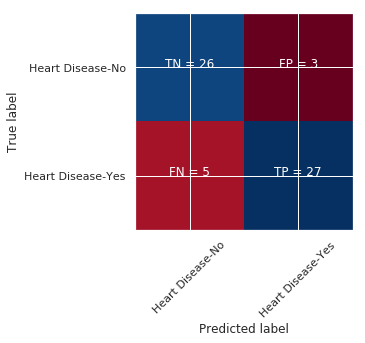

Recall=0.844 
Precision=0.900
F1=0.871


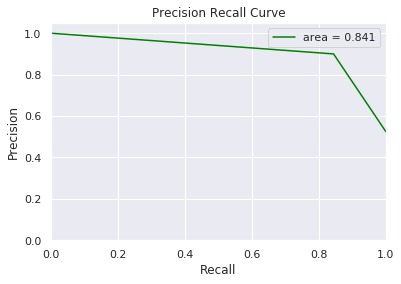

In [30]:
# Random Forest Model with Grid Paramaters
rf_classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=20,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False)
rf_classifier.fit(X_train,y_train)

# Predicting the output on test datset
y_pred = rf_classifier.predict(X_test)    

# Classification score
plot_confusion_matrix(rf_classifier, y_test, y_pred)
plot_prec_rec_curve(rf_classifier, y_test, y_pred)

* F1 Score improved from 85.4 to 87.1

# Model Explanation

## 1. Feature Importance

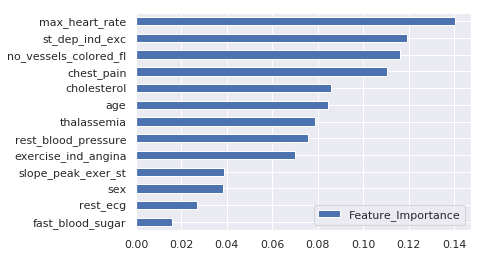

In [31]:
import pandas as pd
feature_importances = pd.DataFrame(rf_classifier.feature_importances_,
                                   index = X_train.columns,
                                   columns=['Feature_Importance']).sort_values('Feature_Importance', ascending=True)
feature_importances.plot(kind='barh')

## 2. ELI5

In [32]:
# Permutation Importance
import eli5
from eli5.sklearn import PermutationImportance

Using TensorFlow backend.


In [33]:
# Feature Importances
# Return an explanation of estimator parameters (weights)
# eli5.explain_weights(rf_classifier, feature_names = X_train.columns.tolist())
eli5.show_weights(rf_classifier, feature_names = X_train.columns.tolist())

Weight,Feature
0.1403 ± 0.1253,max_heart_rate
0.1194 ± 0.1361,st_dep_ind_exc
0.1163 ± 0.0843,no_vessels_colored_fl
0.1103 ± 0.1326,chest_pain
0.0856 ± 0.0992,cholesterol
0.0846 ± 0.0742,age
0.0788 ± 0.1124,thalassemia
0.0756 ± 0.0731,rest_blood_pressure
0.0698 ± 0.1275,exercise_ind_angina
0.0388 ± 0.0873,slope_peak_exer_st


In [34]:
# Show Permutation Importance
perm = PermutationImportance(rf_classifier, random_state=42).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

Weight,Feature
0.1165 ± 0.0230,no_vessels_colored_fl
0.0661 ± 0.0281,thalassemia
0.0512 ± 0.0248,chest_pain
0.0488 ± 0.0142,st_dep_ind_exc
0.0298 ± 0.0062,exercise_ind_angina
0.0264 ± 0.0084,cholesterol
0.0240 ± 0.0033,max_heart_rate
0.0240 ± 0.0121,age
0.0215 ± 0.0160,sex
0.0198 ± 0.0033,rest_ecg


In [35]:
print("Features\n", X_test.iloc[0], "\n Decision", y_test.iloc[0])

Features
 age                       57.0
sex                        1.0
chest_pain                 0.0
rest_blood_pressure      150.0
cholesterol              276.0
fast_blood_sugar           0.0
rest_ecg                   0.0
max_heart_rate           112.0
exercise_ind_angina        1.0
st_dep_ind_exc             0.6
slope_peak_exer_st         1.0
no_vessels_colored_fl      1.0
thalassemia                1.0
Name: 179, dtype: float64 
 Decision 0


In [36]:
# Returns an explanation of estimator prediction
# Examining individual predictions using Show Prediction for 0 ( No Heart Disease )
eli5.show_prediction(rf_classifier, 
                     doc=X_test.iloc[0], 
                     feature_names = X_test.columns.tolist(),
                     show_feature_values=True
                    )

In [37]:
print("Features\n", X_test.iloc[5], "\n Decision", y_test.iloc[5])

Features
 age                       57.0
sex                        1.0
chest_pain                 2.0
rest_blood_pressure      150.0
cholesterol              168.0
fast_blood_sugar           0.0
rest_ecg                   1.0
max_heart_rate           174.0
exercise_ind_angina        0.0
st_dep_ind_exc             1.6
slope_peak_exer_st         2.0
no_vessels_colored_fl      0.0
thalassemia                2.0
Name: 9, dtype: float64 
 Decision 1


In [38]:
# Examining individual predictions using Show Prediction for 1 ( Heart Disease )
eli5.show_prediction(rf_classifier, 
                     doc=X_test.iloc[5], 
                     feature_names = X_test.columns.tolist(),
                     show_feature_values=True
                    )

# 3. SHAP
(Reference : https://github.com/slundberg/shap)

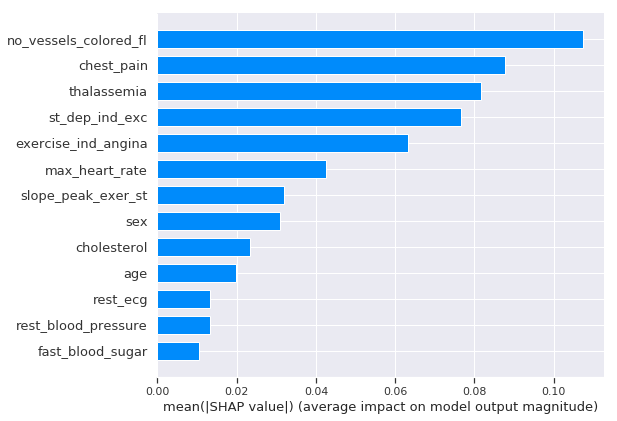

In [39]:
# SHAP - Feature Importance

# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf_classifier)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

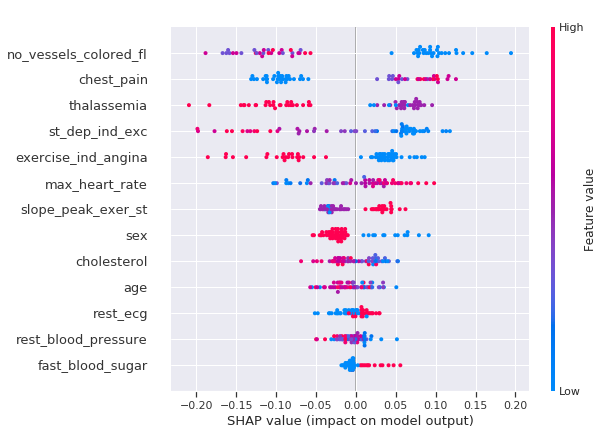

In [40]:
# SHAP - Summary Plot

# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf_classifier)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test)

In [41]:
# SHAP -  Force Plot

#shap.DeepExplainer works with Deep Learning models.
#shap.KernelExplainer works with all models

# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf_classifier)

# Calculate Shap values
shap_values = explainer.shap_values(X_test.iloc[5])

# Force Plot for prediction
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[5])

In [42]:
# use Kernel SHAP to explain test set predictions
k_explainer = shap.KernelExplainer(rf_classifier.predict_proba, X_train)
k_shap_values = k_explainer.shap_values(X_test.iloc[0])
shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], X_test.iloc[0])

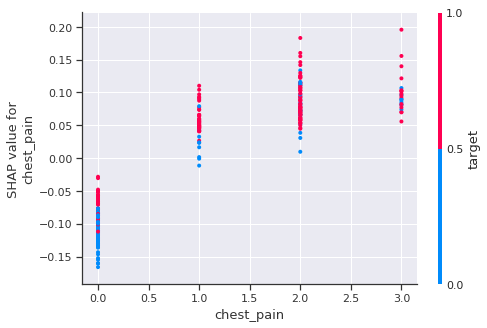

In [43]:
# SHAP - Dependence Plot

# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf_classifier)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(heart_df)

# make plot.
shap.dependence_plot('chest_pain', shap_values[1], heart_df, interaction_index="target")

In this experimentation, we performed EDA, built a model, improved a model using grid search and explained the predictions.

If you liked the kernel, please feel free to upvote.
If you want to connect over Linkedin - https://www.linkedin.com/in/jagannath-banerjee/

Thanks!